# Exercise 4 - Fully Connected Networks and the MNIST dataset

In this exercise we want to train a multi-classification network using fully-connected layers in order to distinguish the different numbers of the MNIST database of handwritten digits.
This exercise is based on https://github.com/leriomaggio/deep-learning-keras-tensorflow



# The MNIST database

The MNIST (Modified National Institute of Standards and Technology) database ([link](http://yann.lecun.com/exdb/mnist)) has a database of handwritten digits. The dataset  consists of 28x28 grayscale images of the 10 digits.

<img src='https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png' style="height:400px; display:inline">

Since this dataset is **provided** with Keras, we can easily load a training and test set using `tensorflow.keras.dataset`.

`from tensorflow.keras.datasets import mnist`<br>
`(X_train, y_train), (X_test, y_test) = mnist.load_data()`

The training set has $60,000$ samples.
The test set has $10,000$ samples.
The digits are size-normalized and centered in a fixed-size image.
The data page has a description on how the data was collected. It also reports the performance of various algorithms on the test dataset.

As usual we will load tensorflow 2 first and make sure we change our runtime to python 3:

In [ ]:
#Check if colab is running
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  %tensorflow_version 2.x

#import TF
import tensorflow as tf
from platform import python_version
print("Tensorflow version", tf.__version__)
print("Python version =",python_version())

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Tensorflow version 2.12.0
Python version = 3.10.11


## Task 1: Data preparation
* Download the data
* Inspect the data and plot a few of the images using `matplotlib.pyplot.imshow`
* Reshape the input data to be in 1D-vectorial form (original data are images)
* Convert the input data to do dtype `float32` using `astype` in order to scale it afterwards
* Normalize the design matrix entries to values between 0 and 1 by scaling it
* How many classes do you have? How much data of each class?
* Convert the class vector to binary class matrices (**one-hot-vector**). Use the `to_categorical` function from `tensorflow.keras.utils` to convert integer labels to **one-hot-vectors**.
* Split the training set into training and validation data (30%)

### Download the datasets and display first entry

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

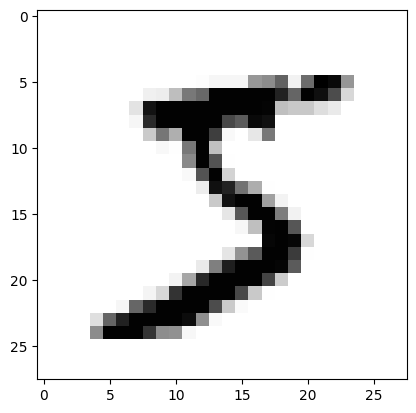

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure()
plt.imshow(X_train[0], cmap=cm.Greys)
plt.show()

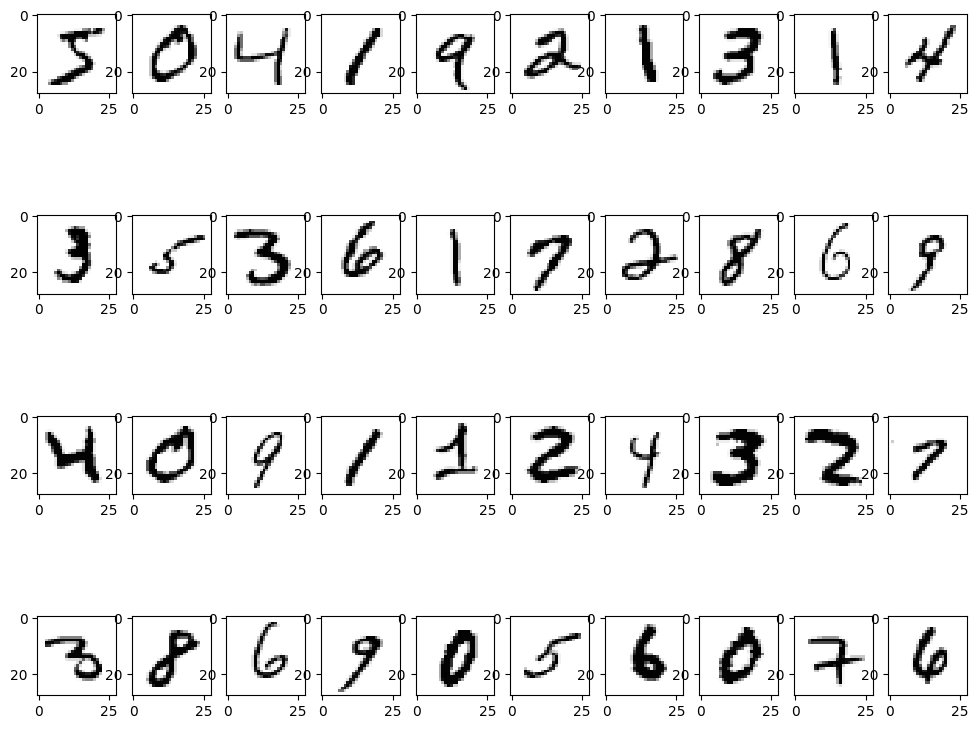

In [ ]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], interpolation='nearest', cmap=cm.Greys)
plt.show()

### Reshape the datasets

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
X_train.shape

(60000, 784)

### Convert to float32

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
X_train.dtype

dtype('float32')

### Scale the input data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Convert class vectors to binary class matrices

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: ylabel='count'>

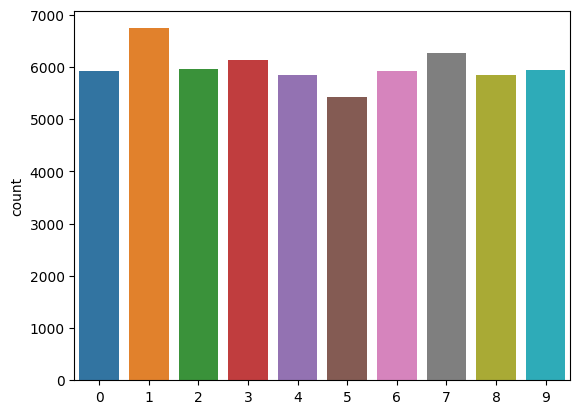

In [ ]:
import seaborn as sns
sns.countplot(x=y_train)

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [ ]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Split Training and Validation Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42, stratify=Y_train)

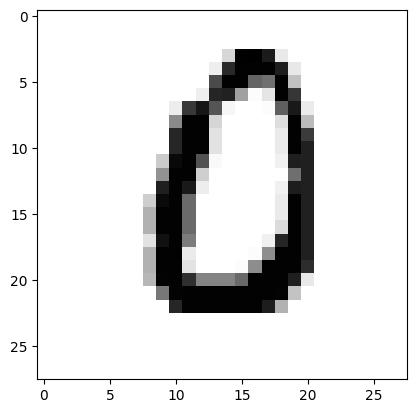

In [ ]:
plt.imshow(X_train[1].reshape(28, 28), cmap=cm.Greys)

In [ ]:
import numpy as np
print(np.asarray(range(10)))
print(Y_train[1].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[1 0 0 0 0 0 0 0 0 0]


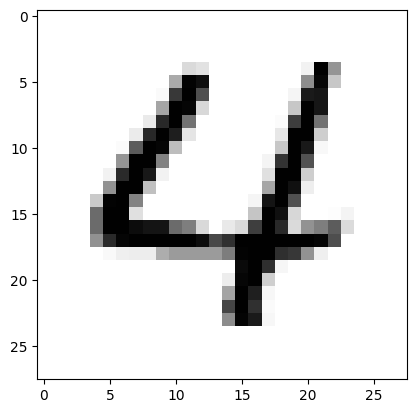

In [ ]:
plt.imshow(X_val[0].reshape(28, 28), cmap=cm.Greys)

In [ ]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 1 0 0 0 0 0]


## Task 2: Build and train a neural network
* Design a dense neural network structure with at least two hidden layers.
* Choose `softmax` as activation for the output node (normalized multi-class probability)
* Use `categorical_crossentropy` as loss function (multi-class version of crossentropy)
* Use `adam` as optimizer and a batch size of 512 (speed things up)
* Train the NN over 50 epochs
* Plot the evolution of the training and validation loss as well as of one meaningful metric by defining a function `plot_history`. What do you observe?
* Evaluate the performance on the test set using `sklearn.metrics`
* Plot the probability of being a *Zero* for true zeros and for all other numbers

## Building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Training

In [ ]:
history = model.fit(X_train, Y_train, batch_size=512, epochs=50, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/50
83/83 [==============================] - 7s 11ms/step - loss: 0.4413 - accuracy: 0.8770 - val_loss: 0.2274 - val_accuracy: 0.9362
Epoch 2/50
83/83 [==============================] - 1s 6ms/step - loss: 0.1624 - accuracy: 0.9522 - val_loss: 0.1436 - val_accuracy: 0.9564
Epoch 3/50
83/83 [==============================] - 1s 7ms/step - loss: 0.1127 - accuracy: 0.9672 - val_loss: 0.1166 - val_accuracy: 0.9641
Epoch 4/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0766 - accuracy: 0.9787 - val_loss: 0.0921 - val_accuracy: 0.9717
Epoch 5/50
83/83 [==============================] - 1s 8ms/step - loss: 0.0537 - accuracy: 0.9849 - val_loss: 0.0900 - val_accuracy: 0.9712
Epoch 6/50
83/83 [==============================] - 0s 6ms/step - loss: 0.0414 - accuracy: 0.9881 - val_loss: 0.0880 - val_accuracy: 0.9731
Epoch 7/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0310 - accuracy: 0.9914 - val_loss: 0.0838 - val_accuracy: 0.9741
Epoch 8/50
83/83 [=

### Plotting the network history
As seen before, the return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and defined metric (accuracy) for each epoch. Let's define a function to plot the history:

In [ ]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

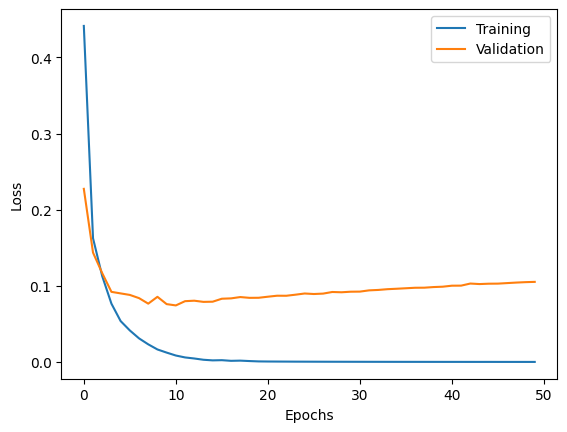

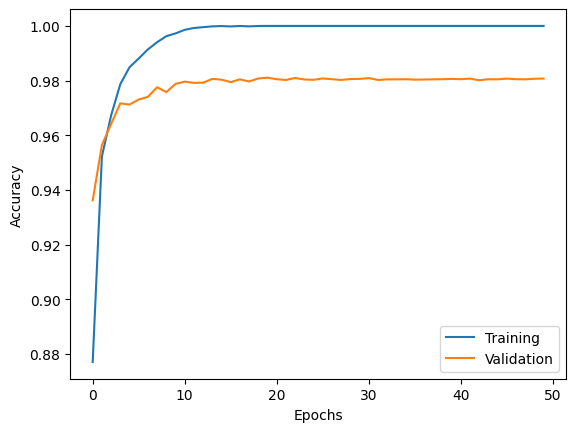

In [ ]:
plot_history(history)

## Evaluation

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=256)
print(loss_and_metrics)

40/40 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9814
[0.09487909823656082, 0.9814000129699707]


In [ ]:
# Predict the values from the test dataset
Y_pred = model.predict(X_test)
print(Y_pred[1])
# Convert predictions classes back from one hot vectors
Y_cls = np.argmax(Y_pred, axis = 1)
print(Y_cls[1])
# Convert validation observations back from one hot vectors
Y_true = np.argmax(Y_test, axis = 1)
print(Y_true[1])

313/313 [==============================] - 1s 3ms/step
[4.6588660e-16 2.6211214e-11 1.0000000e+00 2.2849336e-13 3.2067675e-24
 2.3136385e-15 2.6365821e-13 5.0661307e-23 3.7487062e-12 1.5195335e-23]
2
2


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report:\n', classification_report(Y_true,Y_cls))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Plotting the output

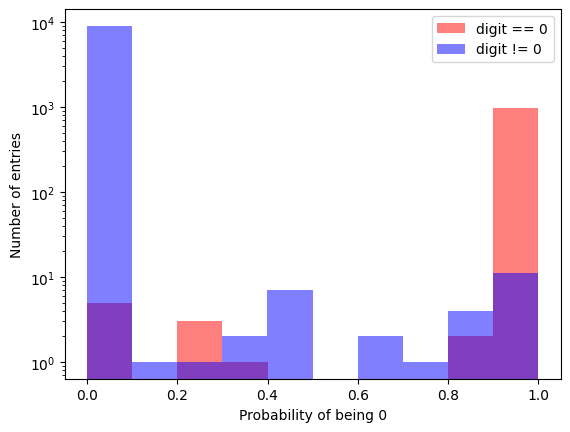

In [ ]:
# Plotting the probability of being a true zero and all other numbers
# Remember: Y_pred is an array with arrays of len 10, in which for each number (0-9) a probability is stored
# We now can plot the probabilities of a number being classified as "0" from the NN by plotting the first entry of the len(10) arrays
label=0
plt.hist(Y_pred[Y_true == label,label], alpha=0.5, color='red', bins=10, log = True)
plt.hist(Y_pred[Y_true != label,label], alpha=0.5, color='blue', bins=10, log = True)
plt.legend(['digit == 0', 'digit != 0'], loc='upper right')
plt.xlabel('Probability of being 0')
plt.ylabel('Number of entries')
plt.show()

### Plotting the normalized probability prob_i = p_i / sum(p_i)

In multi-class problems the interpretation of the n-dimensional output is not always trivial, in particular if an output activation function is used which can not be interpreted as a probability. If one is only interested in distinguishing two of the classes one could build the ratio of these two class responses in order to get the best discrimination. Similarly, one could weight different classes according their importance for the specific problem. Because we have used a softmax activation together with the categorical cross-entropy we can directly interpret our output as probabilities and don't need to normalize it. If that is not the case you can define a multi-class probability for instance in the following way:

In [ ]:
def prob_multiclass(Y_pred, index):
    n_cls = len(Y_pred[0])

    Y_prob=[]
    for i in range(len(Y_pred)):
        numerator=Y_pred[i,index]
        denominator=0.0
        for idx in range(n_cls):
            denominator+=Y_pred[i,idx]

        Y_prob.append(numerator/denominator)

    return np.asarray(Y_prob)

We of course can use this function to plot the probability of being a Zero for true zeros and for all other numbers.

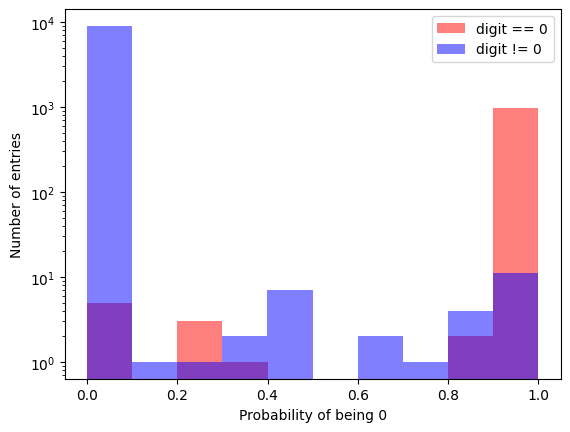

In [ ]:
label=0
Y_pred_prob = prob_multiclass(Y_pred, label)
plt.hist(Y_pred_prob[Y_true == label], alpha=0.5, color='red', bins=10, log = True)
plt.hist(Y_pred_prob[Y_true != label], alpha=0.5, color='blue', bins=10, log = True)
plt.legend(['digit == 0', 'digit != 0'], loc='upper right')
plt.xlabel('Probability of being 0')
plt.ylabel('Number of entries')
plt.show()

### Plot the confusion matrix

A good way to show the performance of a multi-class output is the confusion matrix: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
import itertools
import matplotlib.cm as cm

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

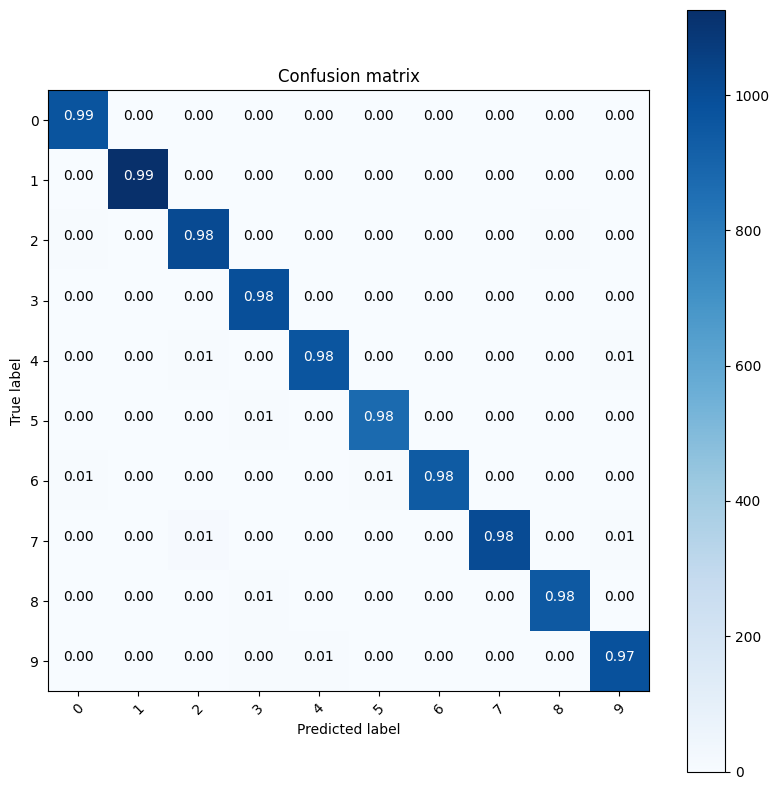

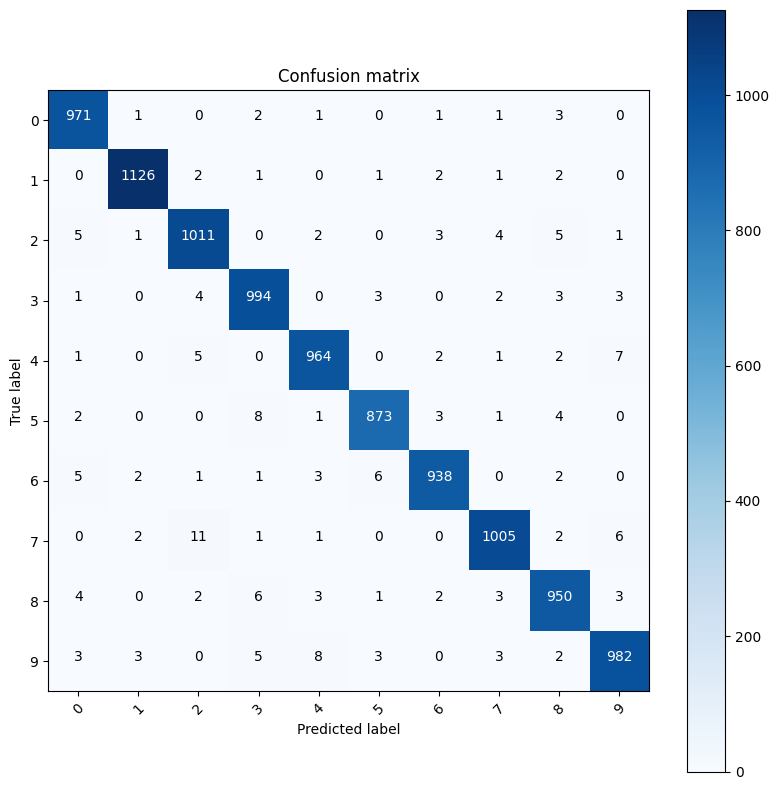

In [ ]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_cls)
# plot the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_mtx, classes = range(10))
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_mtx, classes = range(10), normalize=False)

### Plot wrong associations

 Errors are difference between predicted labels and true labels

In [ ]:
errors = (Y_cls - Y_true != 0)

Y_cls_errors = Y_cls[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

NameError: ignored

Define plotting function

In [ ]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap=cm.Greys, interpolation='nearest')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1


Rank errors by difference in probability

In [ ]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]


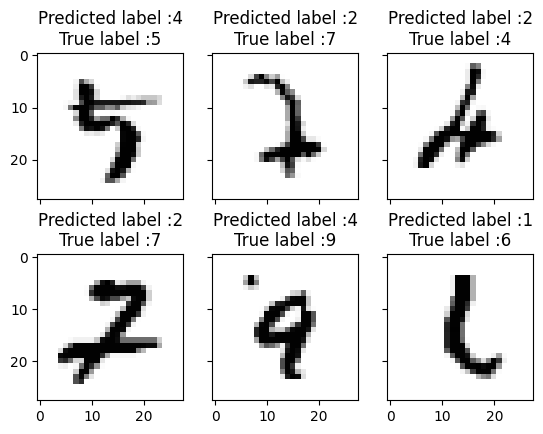

In [ ]:
# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_cls_errors, Y_true_errors)

## Using Dropout Layers

As we have learned last time, the trainings and validation loss of the fit history is not comparable when using dropout. We can define our own callback function which calculates the loss and metric after each epoch for any dataset

In [ ]:
from tensorflow.keras.callbacks import Callback

class HistoryEpoch(Callback):
    def __init__(self, data):
        self.data = data

    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.data
        l, a = self.model.evaluate(x, y, verbose=0)
        self.loss.append(l)
        self.acc.append(a)

## Task 3: Using regularizer


* Modify your previous example network by adding a Dropout layer after each hidden layer
* Add l2 regularization to the hidden layers
* Use the new defined `HistoryEpoch` for training, validation and test data set in order to save a comparable loss function and metric. This is done by e.g.: `train_hist=HistoryEpoch((X_train, Y_train))`. In the `fit` function you can call the callback then by specifying `callbacks=[train_hist]`. You will notice that calling this function every time on epoch end will increase the training time considerably, which is the reason why this is not implemented by default.
* Plot the loss and metric evolution and compare the calculated loss with the default loss from the history
* Evaluate the performance of the NN the same way as we did for the unregularized NN and compare the performance

## Defining a new model and train it

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

dropout=0.5
l2_lambda = 0.0001

model_dropout = Sequential()
model_dropout.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_lambda), input_dim=784))
model_dropout.add(Dropout(dropout))
model_dropout.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_dropout.add(Dropout(dropout))
model_dropout.add(Dense(10, activation='softmax'))

train_hist=HistoryEpoch((X_train, Y_train))
val_hist=HistoryEpoch((X_val, Y_val))
test_hist=HistoryEpoch((X_test, Y_test))


model_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dropout = model_dropout.fit(X_train, Y_train, batch_size=512, epochs=50, verbose=1, validation_data=(X_val, Y_val), callbacks=[val_hist, train_hist, test_hist])


Epoch 1/50
83/83 [==============================] - 10s 109ms/step - loss: 0.7560 - accuracy: 0.7878 - val_loss: 0.3120 - val_accuracy: 0.9306
Epoch 2/50
83/83 [==============================] - 8s 100ms/step - loss: 0.3421 - accuracy: 0.9219 - val_loss: 0.2395 - val_accuracy: 0.9527
Epoch 3/50
83/83 [==============================] - 9s 106ms/step - loss: 0.2782 - accuracy: 0.9406 - val_loss: 0.2127 - val_accuracy: 0.9592
Epoch 4/50
83/83 [==============================] - 9s 106ms/step - loss: 0.2415 - accuracy: 0.9503 - val_loss: 0.1925 - val_accuracy: 0.9652
Epoch 5/50
83/83 [==============================] - 10s 123ms/step - loss: 0.2142 - accuracy: 0.9590 - val_loss: 0.1811 - val_accuracy: 0.9677
Epoch 6/50
83/83 [==============================] - 9s 111ms/step - loss: 0.1964 - accuracy: 0.9630 - val_loss: 0.1698 - val_accuracy: 0.9711
Epoch 7/50
83/83 [==============================] - 6s 78ms/step - loss: 0.1862 - accuracy: 0.9658 - val_loss: 0.1646 - val_accuracy: 0.9727
Epoch

## Plot the history

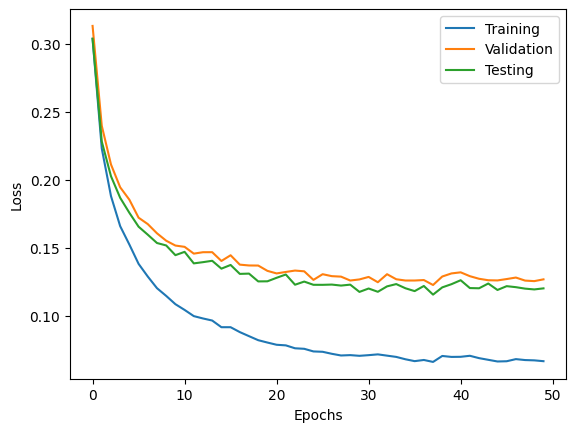

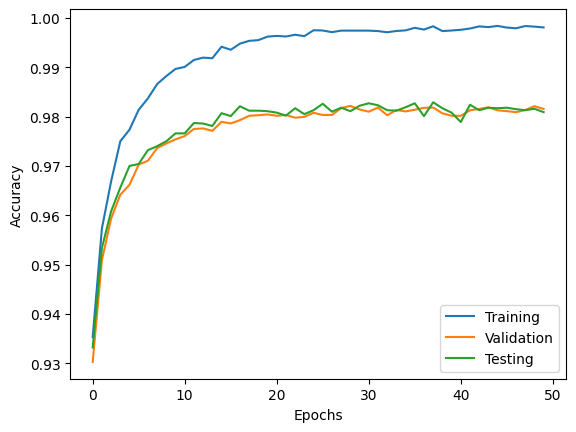

In [ ]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_hist.loss)
plt.plot(val_hist.loss)
plt.plot(test_hist.loss)
plt.legend(['Training', 'Validation', 'Testing'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_hist.acc)
plt.plot(val_hist.acc)
plt.plot(test_hist.acc)
plt.legend(['Training', 'Validation', 'Testing'], loc='lower right')
plt.show()

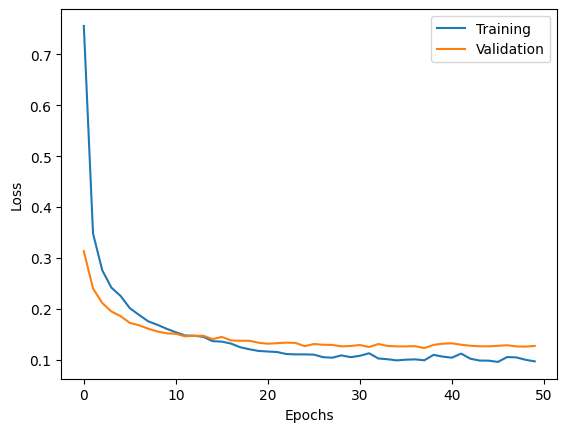

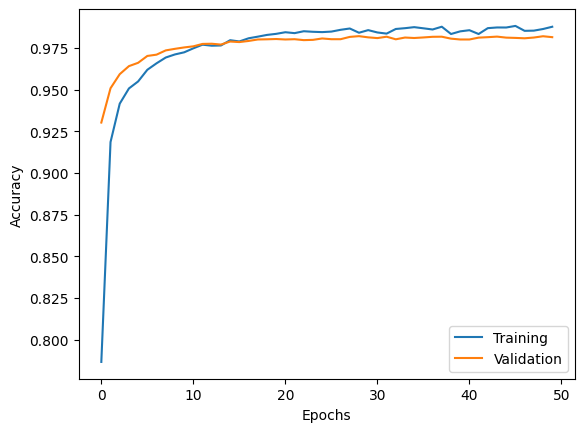

In [ ]:
plot_history(history_dropout)

## Evaluation

In [ ]:
loss_and_metrics = model_dropout.evaluate(X_test, Y_test, batch_size=256)
print(loss_and_metrics)

40/40 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9809
[0.12011712789535522, 0.98089998960495]


In [ ]:
# Predict the values from the test dataset
Y_pred = model_dropout.predict(X_test)
# Convert predictions classes to one hot vectors
Y_cls = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report:\n', classification_report(Y_true,Y_cls))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



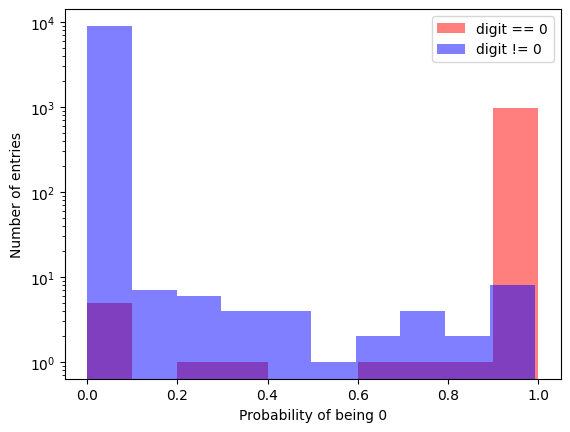

In [ ]:
label=0
Y_pred_prob = prob_multiclass(Y_pred, label)
plt.hist(Y_pred_prob[Y_true == label], alpha=0.5, color='red', bins=10, log = True)
plt.hist(Y_pred_prob[Y_true != label], alpha=0.5, color='blue', bins=10, log = True)
plt.legend(['digit == 0', 'digit != 0'], loc='upper right')
plt.xlabel('Probability of being 0')
plt.ylabel('Number of entries')
plt.show()

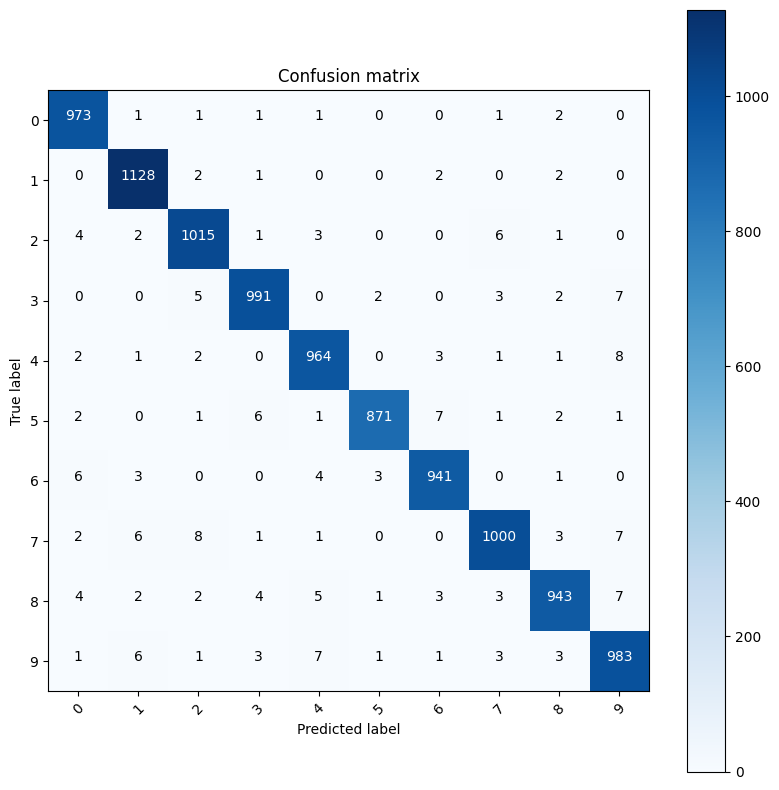

In [ ]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_cls)
# plot the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_mtx, classes = range(10), normalize=False)

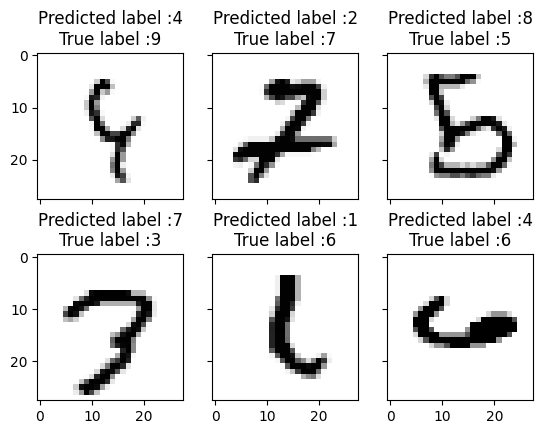

In [ ]:
#errors
errors = (Y_cls - Y_true != 0)

Y_cls_errors = Y_cls[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]
# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_cls_errors, Y_true_errors)

## Early Stopping as a regularizer

* If you continue training, at some point the validation loss will start to increase: that is when the model starts to **overfit**. We can use EarlyStopping as a regularizer:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#Also possible choice:
#early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=1)

dropout=0.5

model_ES = Sequential()
model_ES.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_lambda), input_dim=784))
model_ES.add(Dropout(dropout))
model_ES.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_ES.add(Dropout(dropout))
model_ES.add(Dense(10, activation='softmax'))

model_ES.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dropout.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_ES = model_ES.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=100, batch_size=256, verbose=1,
             callbacks=[early_stop])

Epoch 1/100
165/165 [==============================] - 3s 6ms/step - loss: 0.6291 - accuracy: 0.8282 - val_loss: 0.2699 - val_accuracy: 0.9409
Epoch 2/100
165/165 [==============================] - 1s 5ms/step - loss: 0.3042 - accuracy: 0.9338 - val_loss: 0.2119 - val_accuracy: 0.9591
Epoch 3/100
165/165 [==============================] - 1s 5ms/step - loss: 0.2553 - accuracy: 0.9462 - val_loss: 0.1832 - val_accuracy: 0.9669
Epoch 4/100
165/165 [==============================] - 1s 5ms/step - loss: 0.2197 - accuracy: 0.9569 - val_loss: 0.1701 - val_accuracy: 0.9712
Epoch 5/100
165/165 [==============================] - 1s 5ms/step - loss: 0.2043 - accuracy: 0.9621 - val_loss: 0.1633 - val_accuracy: 0.9718
Epoch 6/100
165/165 [==============================] - 1s 5ms/step - loss: 0.1894 - accuracy: 0.9668 - val_loss: 0.1648 - val_accuracy: 0.9739
Epoch 7/100
165/165 [==============================] - 1s 5ms/step - loss: 0.1770 - accuracy: 0.9692 - val_loss: 0.1543 - val_accuracy: 0.9759

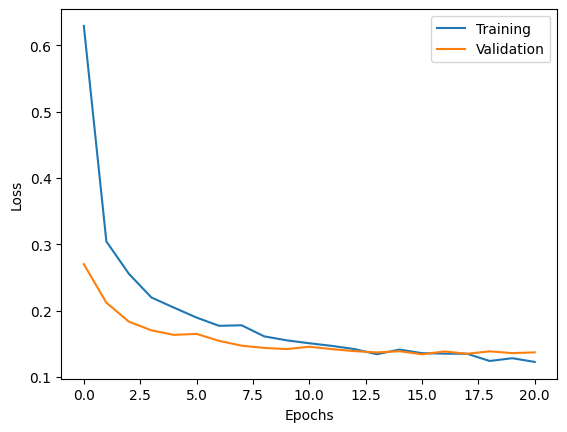

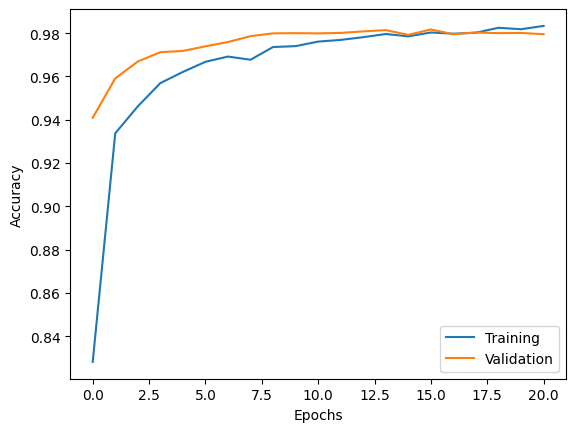

In [ ]:
plot_history(history_ES)

---

# Bonus: Inspecting Layers

In [ ]:
# We already used `summary`
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### `model.layers` is iterable

In [ ]:
print('Model Input Tensors: ', model.input)
print('Layers - Network Configuration:')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), )
print('Model Output Tensors: ', model.output)

Model Input Tensors:  KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
Layers - Network Configuration:
dense True
Layer Configuration:
{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 784), 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
dense_1 True
Layer Configuration:
{'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': N

## Extract hidden layer representation of the given data

One **simple** way to do it is to use the weights of your model to build a new model that's truncated at the layer you want to read.

Then you can run the `.predict(X_batch)` method to get the activations for a batch of inputs.

In [ ]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(dropout))
model_truncated.add(Dense(256, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model_dropout.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# Check
np.all(model_truncated.layers[0].get_weights()[0] == model_dropout.layers[0].get_weights()[0])

NameError: ignored

In [ ]:
hidden_features = model_truncated.predict(X_train)

1313/1313 [==============================] - 2s 1ms/step


In [ ]:
hidden_features.shape

(42000, 256)

In [ ]:
X_train.shape

(42000, 784)

#### Hint: Alternative Method to get activations

(Using `tensorflow.keras.backend` `function` on Tensors)

```python
def get_activations(model, layer, X_batch):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((X_batch, False))
    return activations
```

### Generate the Embedding of Hidden Features

Dimensionality reduction to dim=20 by using principal component analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(hidden_features)
print('Variance PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))

Variance PCA: 0.9484727382659912


Dimensionality reduction to dim=2 by using t-distributed stochastic neighbor embedding (TSNE)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(pca_result[:1000]) ## Reduced for computational issues

In [ ]:
colors_map = np.argmax(Y_train, axis=1)

In [ ]:
X_tsne.shape

(1000, 2)

In [ ]:
nb_classes=10

In [ ]:
np.where(colors_map==6)

(array([    2,     8,    23, ..., 41927, 41983, 41988]),)

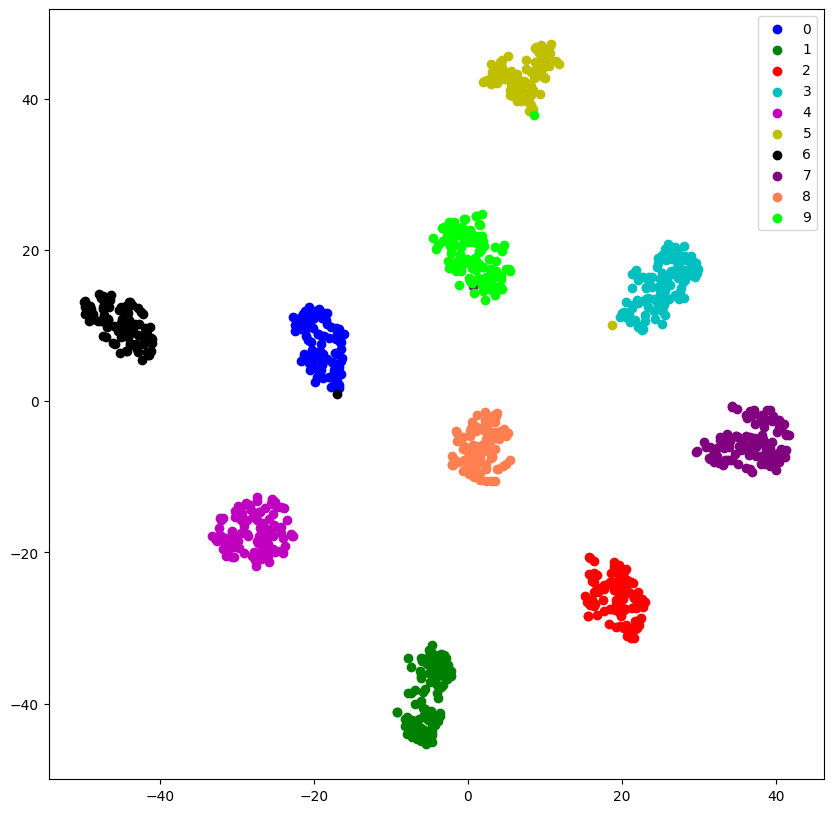

In [ ]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = np.argmax(Y_train, axis=1)
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()